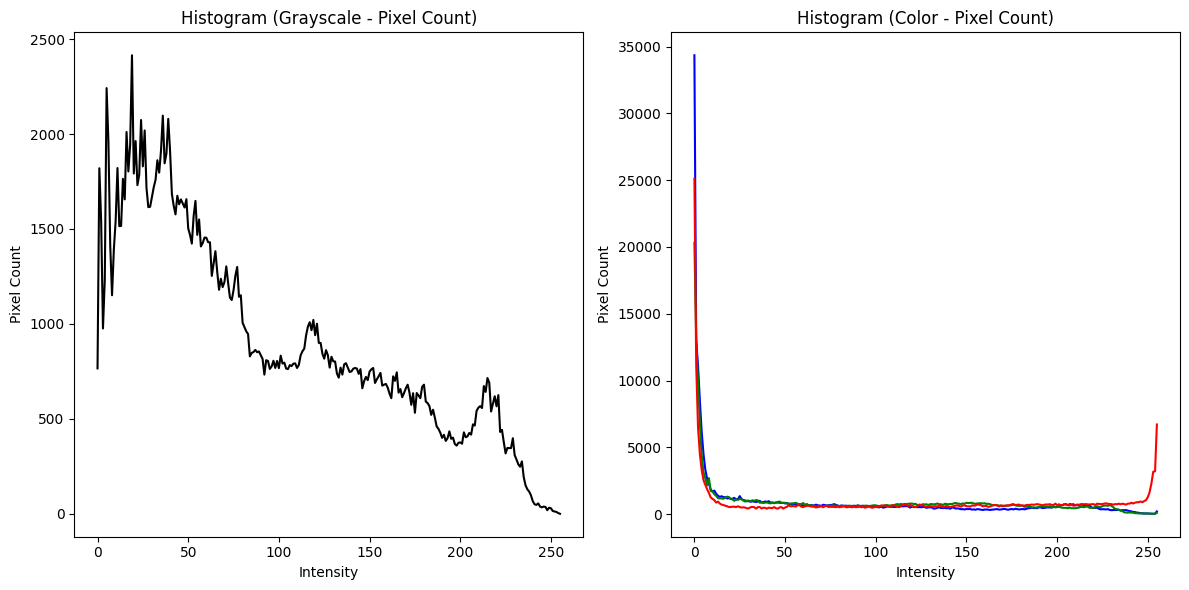

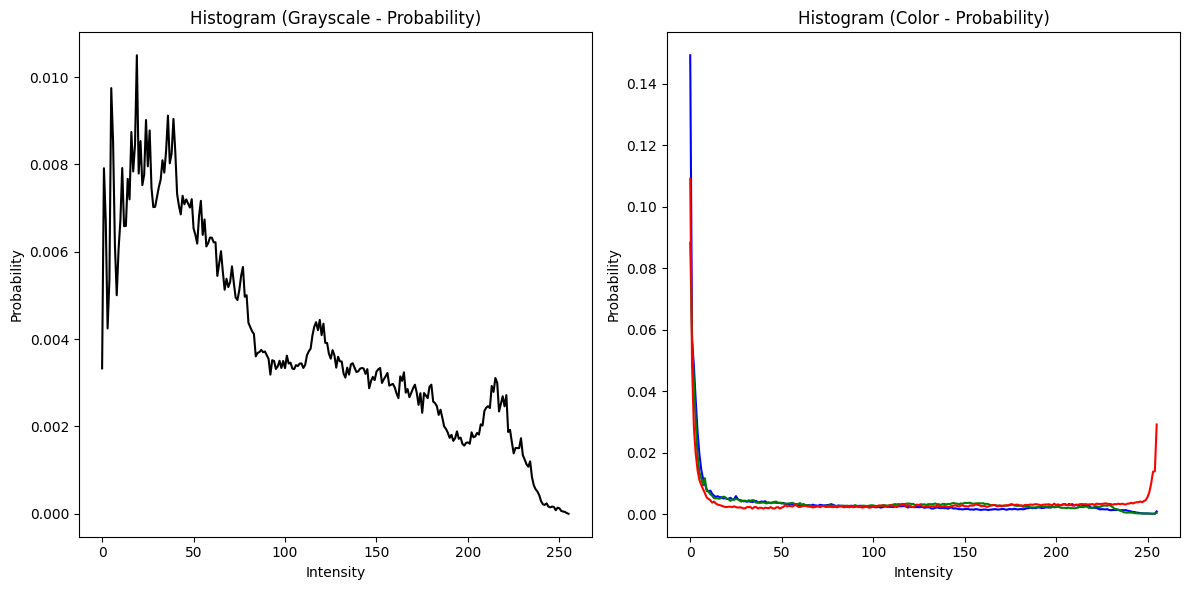

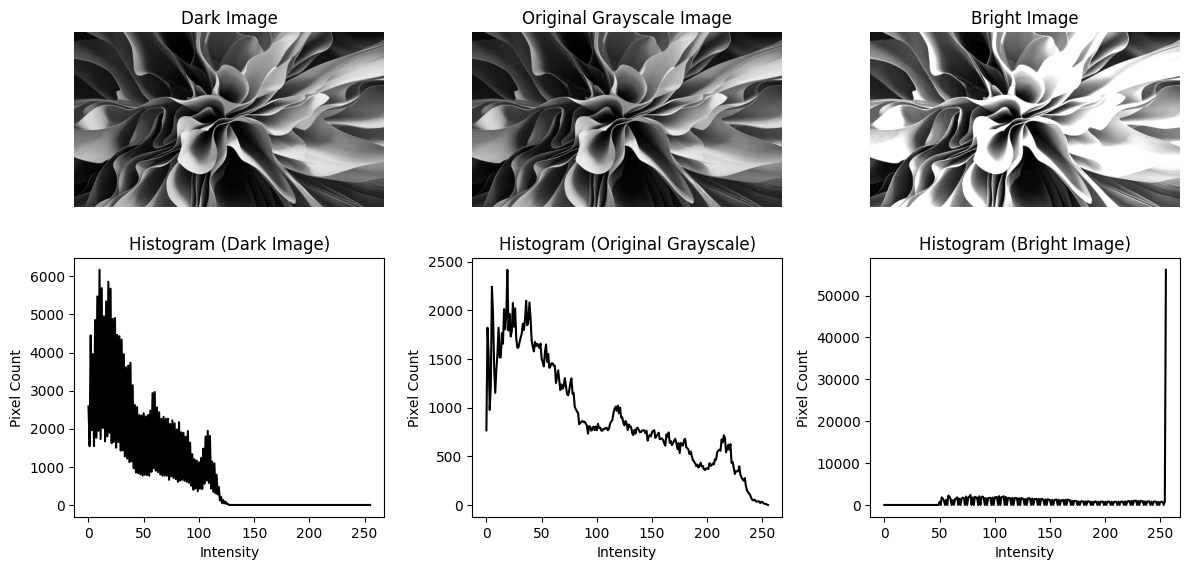

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
g_image =  "/content/ml_image.jpg"

image = cv2.imread(g_image)



gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])


colors = ('b', 'g', 'r')
hist_color = []
for i, color in enumerate(colors):
    hist_color.append(cv2.calcHist([image], [i], None, [256], [0, 256]))


plt.figure(figsize=(12, 6))

# Grayscale Histogram - M1
plt.subplot(1, 2, 1)
plt.plot(hist_gray, color='black')
plt.title("Histogram (Grayscale - Pixel Count)")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")

# Color Histogram - M1
plt.subplot(1, 2, 2)
for i, color in enumerate(colors):
    plt.plot(hist_color[i], color=color)
plt.title("Histogram (Color - Pixel Count)")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")

plt.tight_layout()
plt.show()

# Step 5: Visualize Histogram (M2: Probability)
plt.figure(figsize=(12, 6))

# Normalize histograms for probability representation
hist_gray_prob = hist_gray / hist_gray.sum()
hist_color_prob = [h / h.sum() for h in hist_color]

# Grayscale Histogram - M2
plt.subplot(1, 2, 1)
plt.plot(hist_gray_prob, color='black')
plt.title("Histogram (Grayscale - Probability)")
plt.xlabel("Intensity")
plt.ylabel("Probability")

# Color Histogram - M2
plt.subplot(1, 2, 2)
for i, color in enumerate(colors):
    plt.plot(hist_color_prob[i], color=color)
plt.title("Histogram (Color - Probability)")
plt.xlabel("Intensity")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()

# Step 6: Analyze Histogram for Bright and Dark Images
# Creating artificial bright and dark images
dark_image = cv2.convertScaleAbs(gray_image, alpha=0.5, beta=0)
bright_image = cv2.convertScaleAbs(gray_image, alpha=1.5, beta=50)

# Compute histograms for dark and bright images
hist_dark = cv2.calcHist([dark_image], [0], None, [256], [0, 256])
hist_bright = cv2.calcHist([bright_image], [0], None, [256], [0, 256])

# Display dark and bright images
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(dark_image, cmap='gray')
plt.title("Dark Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(bright_image, cmap='gray')
plt.title("Bright Image")
plt.axis("off")

# Display Histograms for dark and bright images
plt.subplot(2, 3, 4)
plt.plot(hist_dark, color='black')
plt.title("Histogram (Dark Image)")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")

plt.subplot(2, 3, 5)
plt.plot(hist_gray, color='black')
plt.title("Histogram (Original Grayscale)")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")

plt.subplot(2, 3, 6)
plt.plot(hist_bright, color='black')
plt.title("Histogram (Bright Image)")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")

plt.tight_layout()
plt.show()

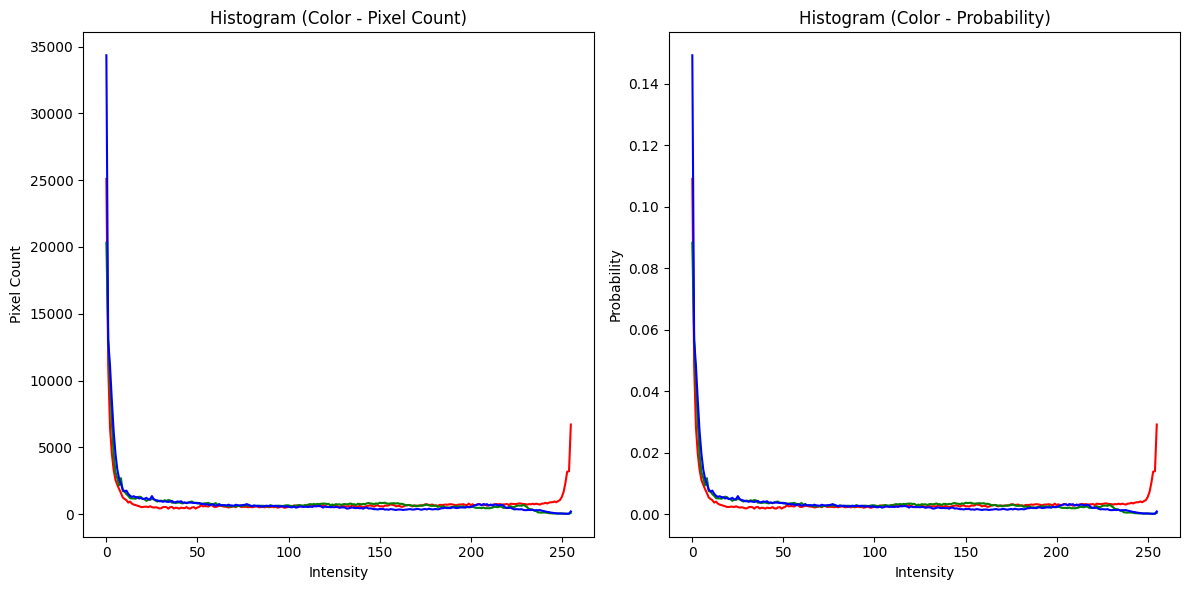

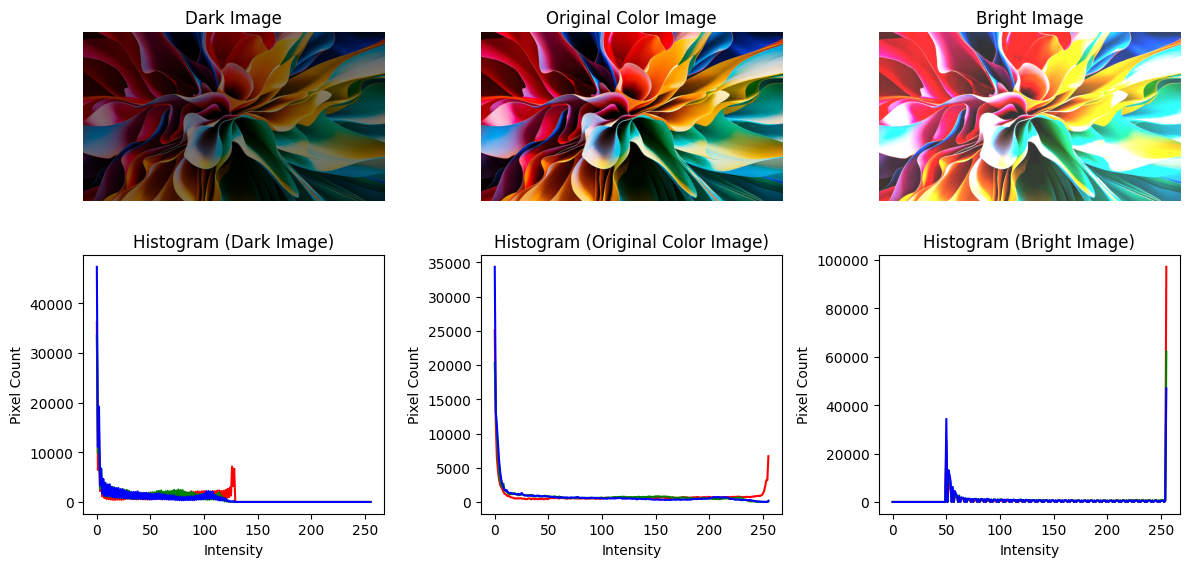

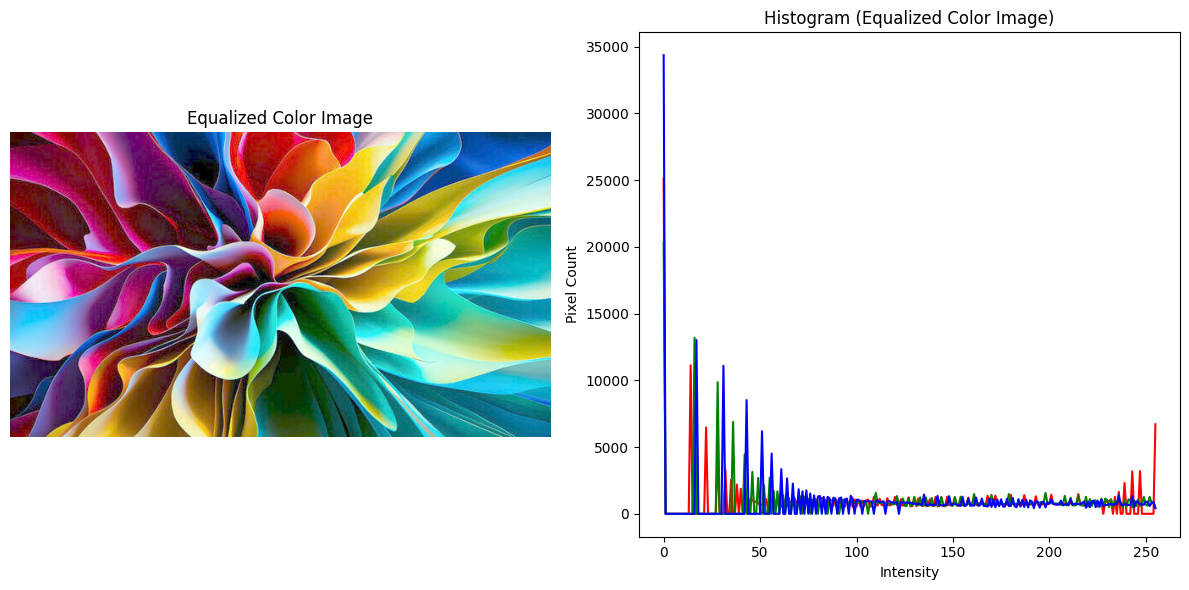

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Image
image = cv2.imread(g_image)  # Change path as needed



# Convert from BGR to RGB (Matplotlib expects RGB format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Compute Histograms (Original)
colors = ('r', 'g', 'b')
hist_color = [cv2.calcHist([image], [i], None, [256], [0, 256]) for i in range(3)]

# Step 3: Visualize Histogram (M1: Pixel Count)
plt.figure(figsize=(12, 6))

# Color Histogram - M1
plt.subplot(1, 2, 1)
for i, color in enumerate(colors):
    plt.plot(hist_color[i], color=color)
plt.title("Histogram (Color - Pixel Count)")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")

# Step 4: Visualize Histogram (M2: Probability)
plt.subplot(1, 2, 2)
hist_color_prob = [h / h.sum() for h in hist_color]
for i, color in enumerate(colors):
    plt.plot(hist_color_prob[i], color=color)
plt.title("Histogram (Color - Probability)")
plt.xlabel("Intensity")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()

# Step 5: Analyze Histogram for Bright and Dark Images
dark_image = cv2.convertScaleAbs(image, alpha=0.5, beta=0)
bright_image = cv2.convertScaleAbs(image, alpha=1.5, beta=50)

# Compute histograms for dark and bright images
hist_dark = [cv2.calcHist([dark_image], [i], None, [256], [0, 256]) for i in range(3)]
hist_bright = [cv2.calcHist([bright_image], [i], None, [256], [0, 256]) for i in range(3)]

# Display dark and bright images
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(dark_image)
plt.title("Dark Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(image)
plt.title("Original Color Image")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(bright_image)
plt.title("Bright Image")
plt.axis("off")

# Display Histograms for dark and bright images
plt.subplot(2, 3, 4)
for i, color in enumerate(colors):
    plt.plot(hist_dark[i], color=color)
plt.title("Histogram (Dark Image)")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")

plt.subplot(2, 3, 5)
for i, color in enumerate(colors):
    plt.plot(hist_color[i], color=color)
plt.title("Histogram (Original Color Image)")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")

plt.subplot(2, 3, 6)
for i, color in enumerate(colors):
    plt.plot(hist_bright[i], color=color)
plt.title("Histogram (Bright Image)")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")

plt.tight_layout()
plt.show()

# Step 6: Enhance Contrast using Histogram Equalization (RGB)
# Apply histogram equalization separately to each channel
equalized_channels = [cv2.equalizeHist(image[:, :, i]) for i in range(3)]
equalized_image = cv2.merge(equalized_channels)

# Compute histograms for equalized image
hist_eq = [cv2.calcHist([equalized_image], [i], None, [256], [0, 256]) for i in range(3)]

# Display Equalized Image and its Histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(equalized_image)
plt.title("Equalized Color Image")
plt.axis("off")

plt.subplot(1, 2, 2)
for i, color in enumerate(colors):
    plt.plot(hist_eq[i], color=color)
plt.title("Histogram (Equalized Color Image)")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")

plt.tight_layout()
plt.show()

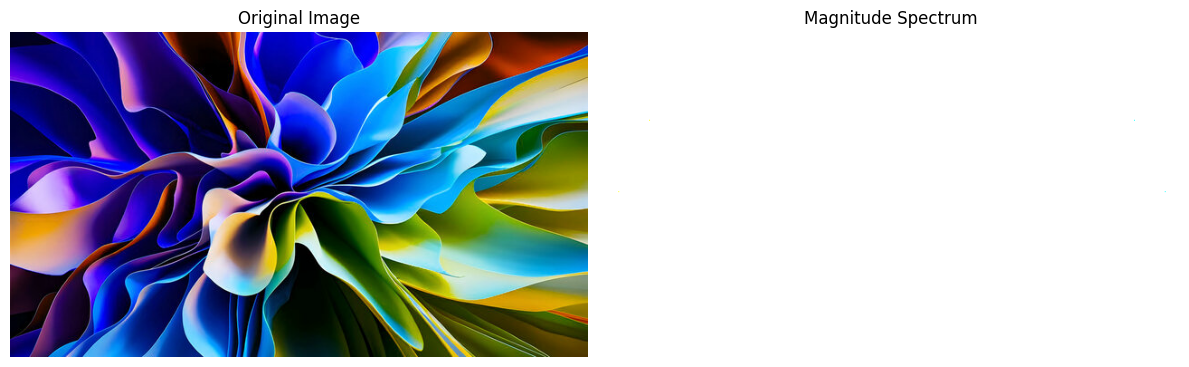

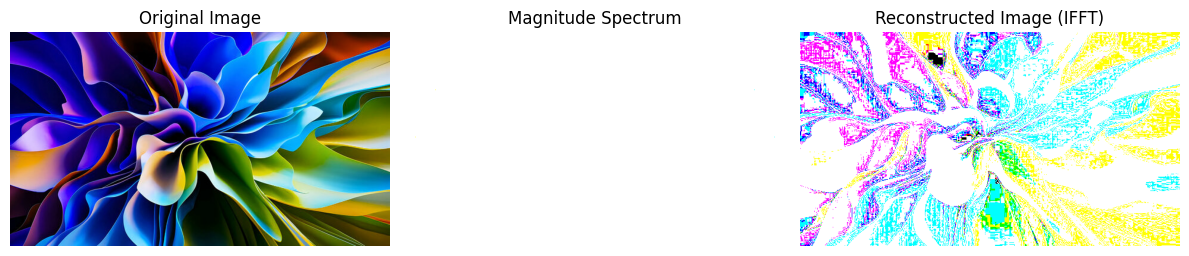

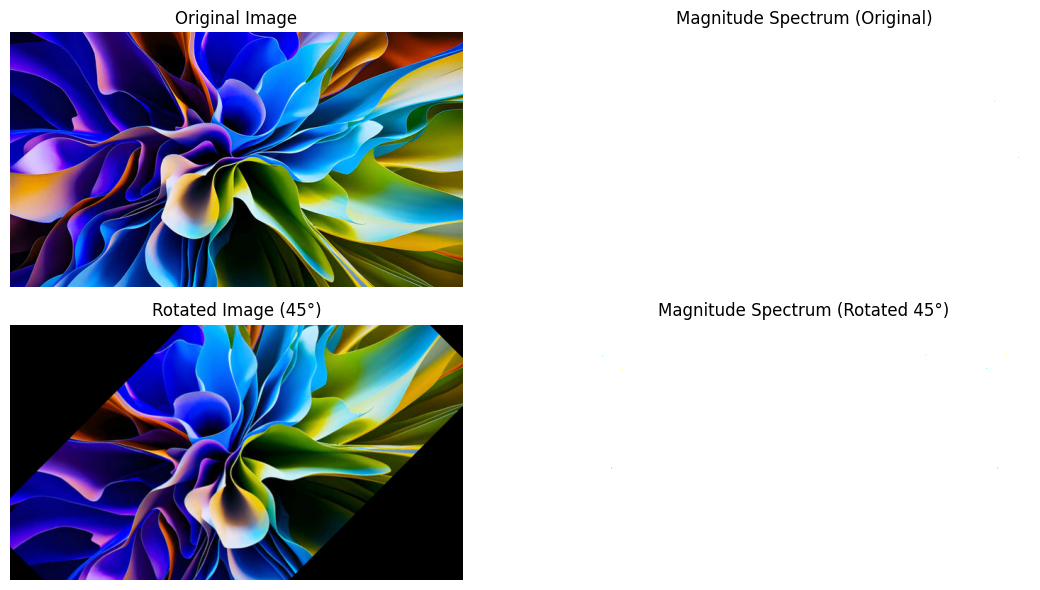

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Grayscale Image
image = cv2.imread(g_image)

# Step 2: Compute the Discrete Fourier Transform (DFT) using FFT
dft = np.fft.fft2(image)  # Compute 2D FFT
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency component to center
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))  # Compute magnitude spectrum

# Step 3: Display Original Image and its Magnitude Spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum")
plt.axis("off")

plt.tight_layout()
plt.show()

# Step 4: Apply the Inverse Fourier Transform (IFFT) to reconstruct the image
dft_inverse_shift = np.fft.ifftshift(dft_shift)  # Shift back
reconstructed_image = np.fft.ifft2(dft_inverse_shift).real  # Compute Inverse FFT

# Step 5: Display Original, Magnitude Spectrum, and Reconstructed Image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap="gray")
plt.title("Reconstructed Image (IFFT)")
plt.axis("off")

plt.tight_layout()
plt.show()

# Step 6: Verify the Rotation Property of Fourier Transform
# Rotate the image by 45 degrees
angle = 45
(h, w,_) = image.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Compute FFT of Rotated Image
dft_rotated = np.fft.fft2(rotated_image)
dft_rotated_shift = np.fft.fftshift(dft_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(dft_rotated_shift))

# Step 7: Display Original, Rotated Image, and Their Magnitude Spectrums
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum (Original)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(rotated_image, cmap="gray")
plt.title(f"Rotated Image ({angle}°)")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(magnitude_spectrum_rotated, cmap="gray")
plt.title(f"Magnitude Spectrum (Rotated {angle}°)")
plt.axis("off")

plt.tight_layout()
plt.show()